In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

In [ ]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First Feature")
plt.ylabel("Second Feature")
print(f"Shape of X is {X.shape}")

Wave data set

Text(0, 0.5, 'Regresion Target')

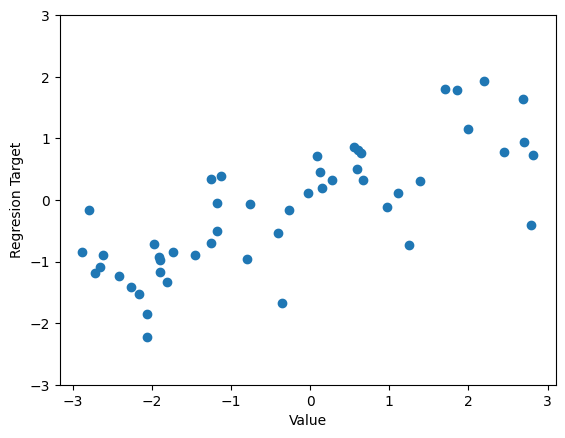

In [61]:
X, y = mglearn.datasets.make_wave(n_samples=50)
# display(X)
# display(y)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Value")
plt.ylabel("Regresion Target")

Reseach "Bunch Objects"

In [3]:
from sklearn.datasets import load_breast_cancer
from collections import Counter

cancer = load_breast_cancer()
print(cancer.keys())
# display({key: val for key, val in zip(cancer["target_names"], np.bincount(cancer["target"]))})
display(cancer["feature_names"])
# print(cancer["DESCR"])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Boston Data set, Predicting House value due to some criteria

In [103]:
from sklearn.datasets import load_digits

X, y = mglearn.datasets.load_extended_boston()
display(X.shape)


# digits = load_digits()
# display(digits.keys())
# display(digits["data"])

(506, 104)

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors=5)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
display(X.shape)
display(X_train.shape)
display(X_test.shape)

clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print(f"Predictions: {predictions}")
print(f"Score: {clf.score(X_test, y_test)}")

(26, 2)

(19, 2)

(7, 2)

Predictions: [1 0 1 0 1 0 0]
Score: 0.8571428571428571


Decision Boundary fo KNN (1, 3, 9)

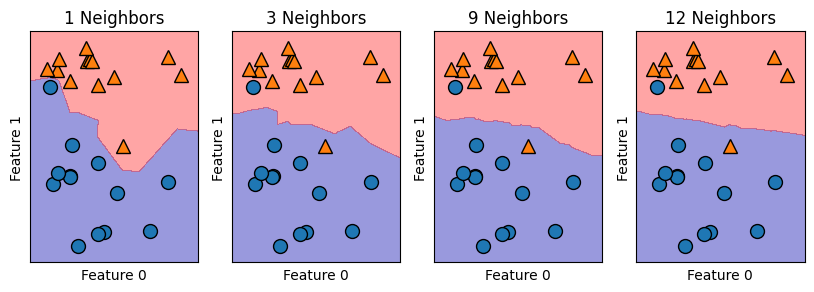

In [38]:
fig, axes = plt.subplots(1, 4, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9, 12], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f"{n_neighbors} Neighbors")
    ax.set_xlabel(f"Feature 0")
    ax.set_ylabel(f"Feature 1")
# axes[0].legend(loc=3)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

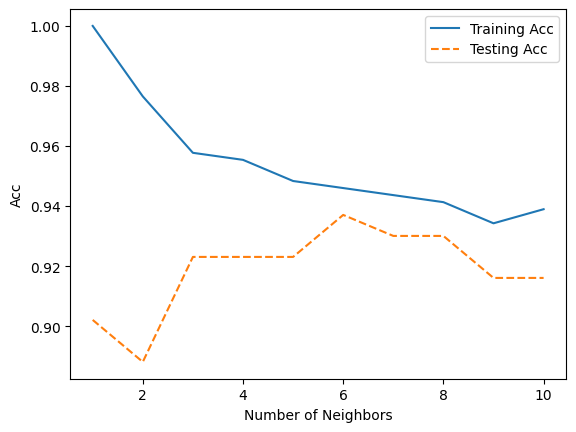

In [60]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

cancer = load_breast_cancer()
display(cancer.keys())

X_train, X_test, y_train, y_test = train_test_split(cancer["data"], cancer["target"], 
                                                    stratify=cancer["target"],
                                                    random_state=66)

training_accuracy = []
testing_accuracy = []

neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:

    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    testing_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="Training Acc")
plt.plot(neighbors_settings, testing_accuracy, '--', label="Testing Acc")
plt.xlabel("Number of Neighbors")
plt.ylabel("Acc")
plt.legend()

Regresion Variant of KNN

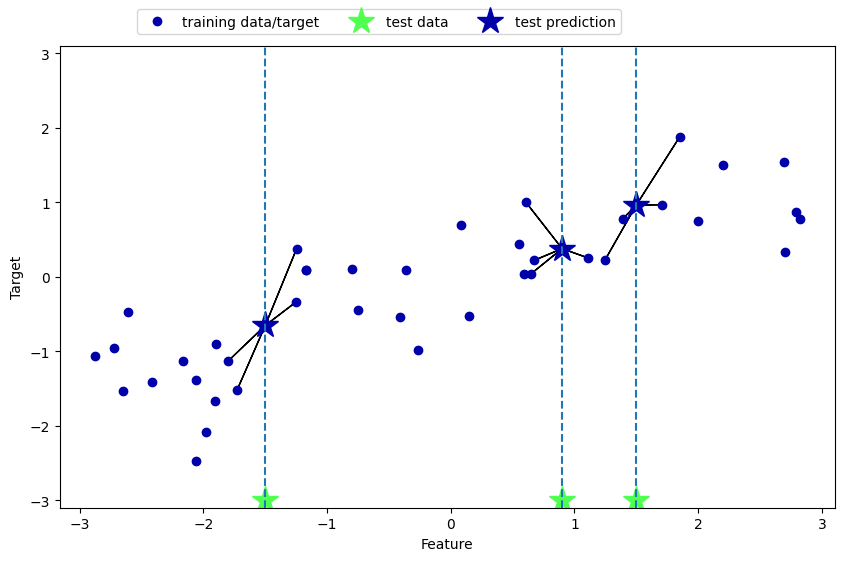

In [63]:
mglearn.plots.plot_knn_regression(n_neighbors=4)

In [16]:
from sklearn.neighbors import KNeighborsRegressor
import mglearn
from sklearn.model_selection import train_test_split

reg = KNeighborsRegressor(n_neighbors=3)
X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg.fit(X_train, y_train)

print(f"{reg.predict(X_test)}")
print(f"Regression Score: {reg.score(X_test, y_test)}")

[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


ValueError: continuous is not supported

[<Axes: > <Axes: > <Axes: >]


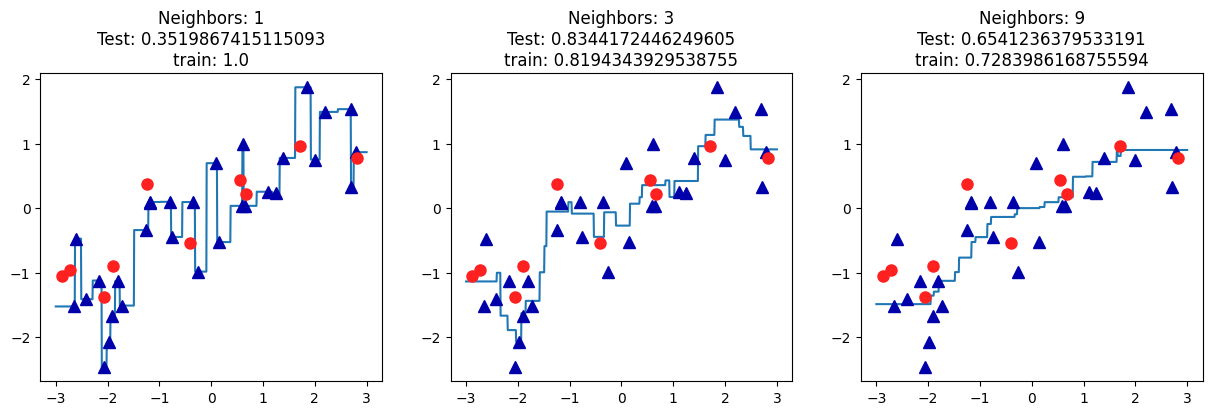

In [13]:
fig, axe = plt.subplots(1, 3, figsize=(15, 4))
print(axe)

line = np.linspace(-3, 3, 1_000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axe):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'o', c=mglearn.cm2(1), markersize=8)
    ax.set_title(f"Neighbors: {n_neighbors}\nTest: {reg.score(X_test, y_test)}\ntrain: {reg.score(X_train, y_train)}")